# <font color='blue'> Linear Models - regression, logistic regression : Supervised learning
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

<img src='https://images.unsplash.com/photo-1519749296331-a397500bf1fe?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8bGluZWFyJTIwZmxvd2Vyc3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60'>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## **1. 단순 회귀 생성(Simple Linear Regression)**

<img src='https://external-preview.redd.it/5YiJMWW-7ZWn0_MCaFIcJoKgYl7A1m-158Vq_pM7C-E.jpg?width=640&crop=smart&auto=webp&s=f182ca196759990d93e7c41a9ed5921aad684588'>

직선(선형변환식)으로 데이터를 학습(fit, learning)한다.
$$
y = ax + b
$$

$a$ 는 직선의 기울기*(slope)*, $b$는 직선의 절편(*intercept*).
기울기가 2이고 절편이 -5인 직선을 가정하면

In [2]:
from sklearn import linear_model
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = 3 * x + rng.randn(100)*2

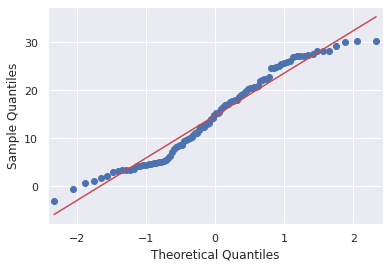

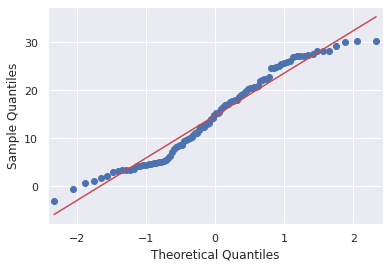

In [3]:
import statsmodels.api as sm
sm.qqplot(y, line ='s')

In [ ]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 100)

yfit = model.predict(xfit[:, np.newaxis])

LinearRegression()

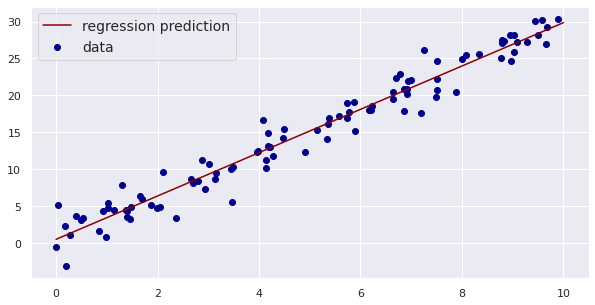

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.scatter(x, y, color='darkblue', label='data')
plt.plot(xfit, yfit, color='darkred', label='regression prediction')
plt.legend(fontsize='14')

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'Model intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, yfit)}')

Model intercept: 0.4739145082978151
Coefficients: [2.93698502]
Mean squared error: 126.40318941029554


## **2. 다중 회귀 생성(Multiple Linear Regression)**

단순회귀식(simple regression model)보다 다중회귀식(Multiple regression)은 복수의 입력변수$x$를 갖는다.

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(1000, 5)
y = 0.5 + np.dot(X, [1.5, -2., 1., 3.5, 1.3])
model.fit(X, y)
print(model.intercept_)
print('\n')
print(model.coef_)

LinearRegression()

0.49999999999998934


[ 1.5 -2.   1.   3.5  1.3]


## scikit-learn API

In [ ]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); print(f'X.shape: {X.shape}')
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); print(f'X.reshape(-1,1): {X.shape}') # X = X[:,np.newaxis] 
y_predict = LinearRegression().fit(X,y).predict(X)

X.shape: (100,)
X.reshape(-1,1): (100, 1)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
Xfit = np.linspace(0, 10, 100)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
yfit = poly_model.fit(X, y).predict(Xfit[:,np.newaxis])

In [ ]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

<Figure size 1440x432 with 0 Axes>

(-4.0, 4.0)

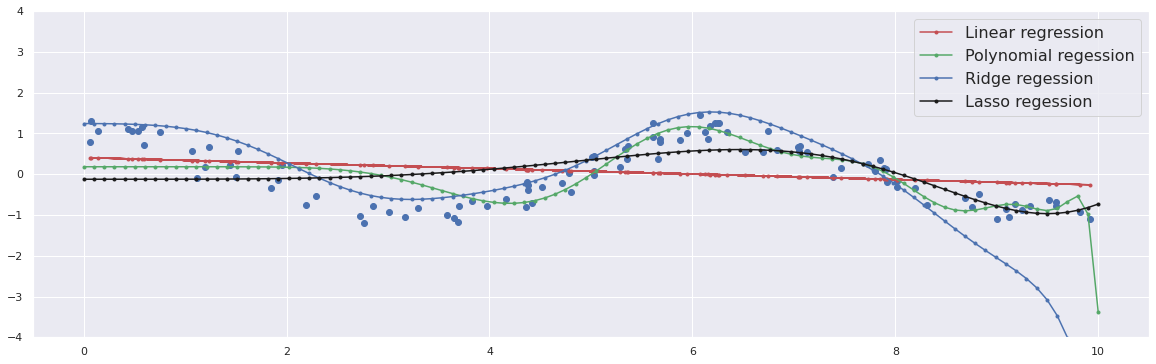

In [ ]:
plt.figure(figsize=(20, 6)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

### **Basis Function Regression**

- 입력변수와 종속변수의 선형회귀식(linear regression)을 비선형회귀식(nonlinear relationships)으로 변형하기 위해 기저함수(*basis functions*)를 적용한다.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$

$x_n = f_n(x)$, where $f_n()$ is 입력데이터(행렬)을 변환하는 함수

예를 들어 if $f_n(x) = x^n$, 모델은 다항회귀식(polynomial regression):

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

<img src = 'https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png'>


<img src='https://miro.medium.com/max/1400/1*zMLv7EHYtjfr94JOBzjqTA.png' width=600>

### Regularization for Sparsity: L₁ Regularization
- https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization

### Regularization for Simplicity: Playground Exercise (L2 Regularization) 
- https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/playground-exercise-examining-l2-regularization

## **3. 로지스틱 회귀분석(Logistic Regression)**

### statsmodels.api

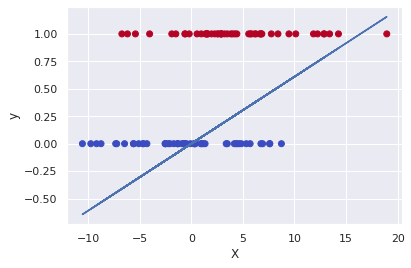

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


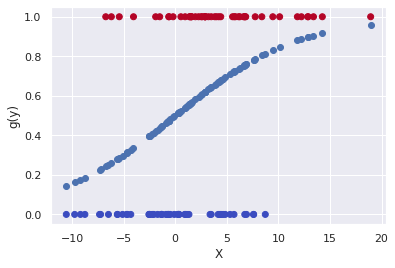

In [ ]:
from sklearn.datasets import make_blobs
import statsmodels.api as sm
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)
y_predict = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_predict); plt.ylabel('y'); plt.xlabel('X'); plt.show()

y_predict = sm.Logit(y, X).fit().predict(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X'); 

##  실습 예제: Digits Classification Exercise

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df['label'] = df['label'].apply(lambda x: 0 if x != 1 else x)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,0


0

0    0.89872
1    0.10128
Name: label, dtype: float64

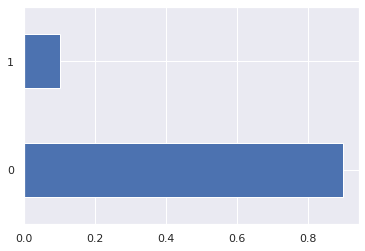

In [ ]:
X = df.drop('label', axis=1)
X = X/X.max() # 표준화
X.fillna(0, inplace=True)
df.isnull().sum().sum()
y = df['label']
y.value_counts(normalize=True)
y.value_counts(normalize=True).plot.barh()

In [ ]:
# 모델 선택
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
np.random.seed(1357)
kf = KFold(n_splits=3)
model = LogisticRegression(solver='saga', random_state=11)
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall')
grid.fit(X_train, y_train)
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11, solver='saga'),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall')

optimal train score: 0.925
test score: 0.972
optimal parameter: {'penalty': 'l2', 'C': 78.47599703514607}


In [ ]:
model= LogisticRegression(random_state=11, solver='saga').set_params(**grid.best_params_)
model.get_params()
model.fit(X_train, y_train)
model.intercept_

{'C': 78.47599703514607,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 11,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

LogisticRegression(C=78.47599703514607, random_state=11, solver='saga')

array([-10.89740031])

### L2 regularization
- 코드가 길면 ()

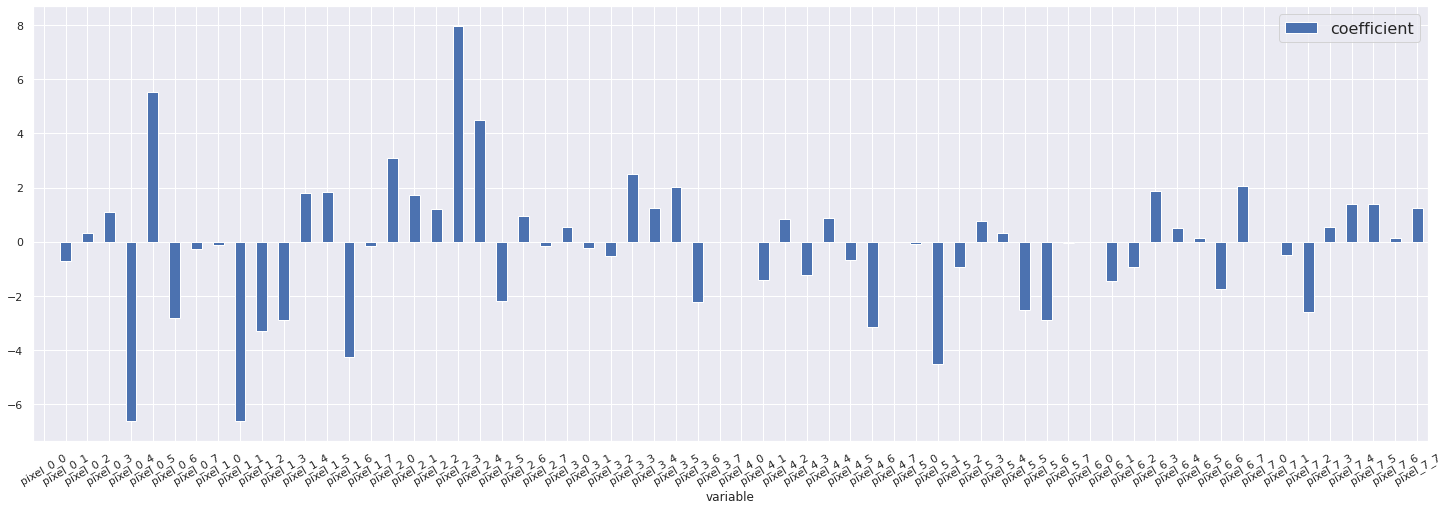

In [ ]:
data = zip(X_train.columns, np.squeeze(model.coef_))
(pd.DataFrame(data, columns =['variable', 'coefficient']).set_index('variable').
plot.bar(rot='30', figsize=(25,8)))

## **4. Feature selection with lasso penalty(L1)**

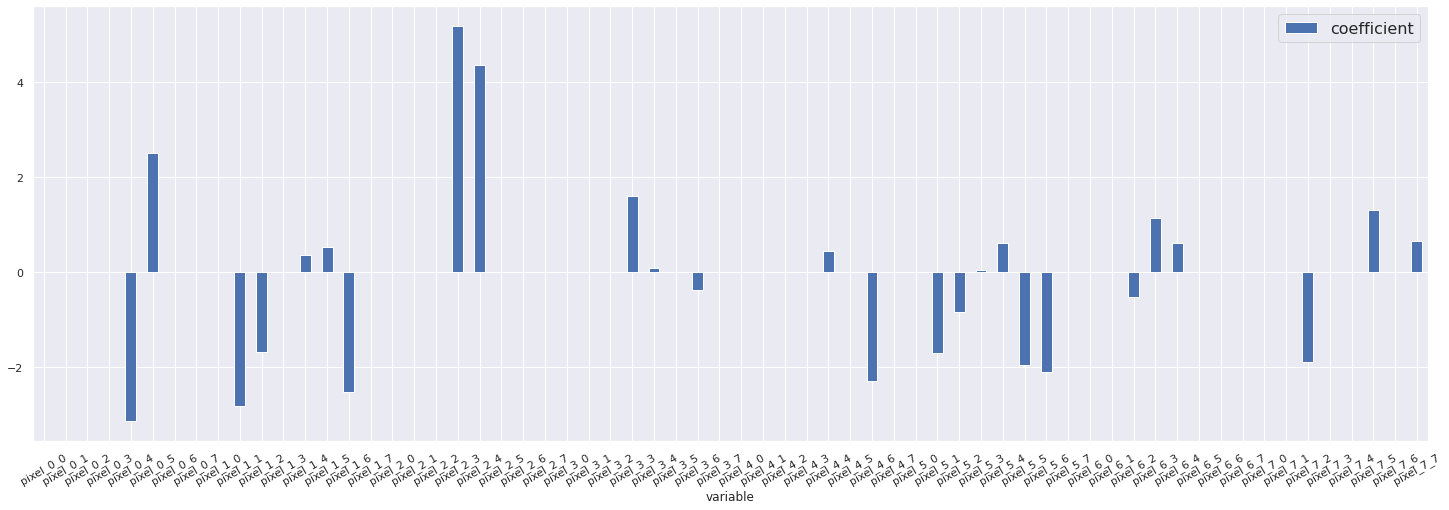

In [ ]:
l1_coef = LogisticRegression(solver='saga', penalty='l1').fit(X_train, y_train).coef_
data = zip(X_train.columns, np.squeeze(l1_coef))
(pd.DataFrame(data, columns =['variable', 'coefficient']).set_index('variable').
plot.bar(rot='30', figsize=(25,8)))

In [ ]:
LogisticRegression(solver='saga', penalty='l1').fit(X_train, y_train).coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.15482939e+00,  2.51167664e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.83912600e+00, -1.68892682e+00, -1.12608783e-08,
         3.40894234e-01,  5.21605654e-01, -2.53033298e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.17962336e+00,  4.35618336e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.59620320e+00,  7.61742674e-02,  0.00000000e+00,
        -3.74239067e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.34099681e-01,  0.00000000e+00, -2.31567215e+00,
         0.00000000e+00,  0.00000000e+00, -1.72781304e+00,
        -8.47718806e-01,  3.32871849e-02,  5.98321410e-01,
        -1.96445393e+00, -2.11644432e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -5.26936240e-0

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       324
           1       0.92      0.97      0.95        36

    accuracy                           0.99       360
   macro avg       0.96      0.98      0.97       360
weighted avg       0.99      0.99      0.99       360



(array([310.,   5.,   3.,   2.,   2.,   2.,   1.,   4.,   7.,  24.]),
 array([3.68894311e-12, 9.99719028e-02, 1.99943806e-01, 2.99915708e-01,
        3.99887611e-01, 4.99859514e-01, 5.99831417e-01, 6.99803320e-01,
        7.99775222e-01, 8.99747125e-01, 9.99719028e-01]),
 <a list of 10 Patch objects>)

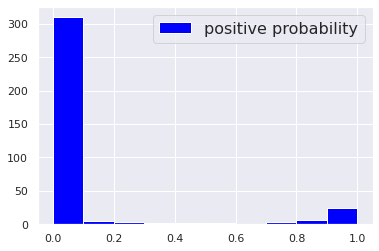

(array([ 24.,   7.,   4.,   1.,   2.,   2.,   2.,   3.,   5., 310.]),
 array([2.80971916e-04, 1.00252875e-01, 2.00224778e-01, 3.00196680e-01,
        4.00168583e-01, 5.00140486e-01, 6.00112389e-01, 7.00084292e-01,
        8.00056194e-01, 9.00028097e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

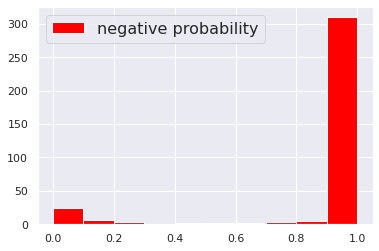

In [ ]:
y_proba = model.predict_proba(X_test)
plt.hist(y_proba[:, 1], color ='blue', label='positive probability'); plt.legend(); plt.show()
plt.hist(y_proba[:, 0], color ='red', label='negative probability'); plt.legend()

## **5. Learning curve in machine learning**
- It is a tool to find out how much a machine model benefits from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, it will not benefit much from more training data. (https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Learning_Curves_%28Naive_Bayes%29.png/440px-Learning_Curves_%28Naive_Bayes%29.png'>

### The general behavior from a learning curve :
- A model will overfit a small dataset(Overfitting): this means the training score will be relatively high, while the validation score will be relatively low.
- A model will underfit a large dataset(Underfitting): this means that the training score will decrease, but the validation score will increase.
- A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
- https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, cv=5)
train_sizes
print('\n')
train_scores
print('\n')
valid_scores

array([ 143,  467,  790, 1113, 1437])

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99785867, 0.99785867, 0.99785867, 0.99785867, 0.99785867],
       [0.99873418, 1.        , 0.99620253, 0.99620253, 0.99620253],
       [0.99820305, 0.99371069, 0.99460916, 0.99730458, 0.99730458],
       [0.99512874, 0.99025748, 0.99025748, 0.99095338, 0.99234516]])

array([[0.93611111, 0.91944444, 0.89415042, 0.93593315, 0.93593315],
       [0.92777778, 0.94722222, 0.94986072, 0.97771588, 0.95264624],
       [0.93055556, 0.98888889, 0.98607242, 0.97771588, 0.95821727],
       [0.94444444, 0.98333333, 0.97214485, 0.98328691, 0.95821727],
       [0.93333333, 0.98333333, 0.97493036, 0.98885794, 0.96935933]])

In [ ]:
train_scores.mean(1)
print('\n')
valid_scores.mean(1)

array([1.        , 0.99785867, 0.99746835, 0.99622642, 0.99178845])

array([0.92431445, 0.95104457, 0.96829   , 0.96828536, 0.96996286])

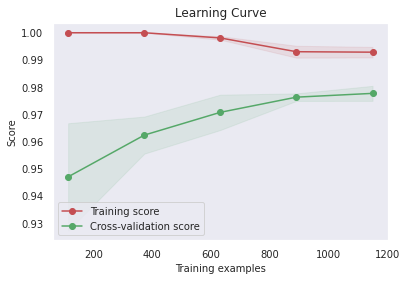

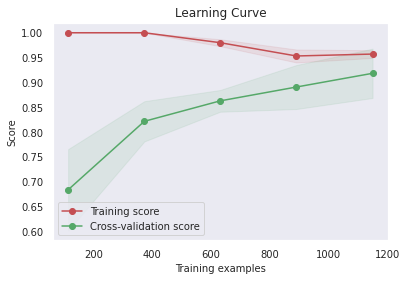

In [ ]:
! pip install scikit-plot
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall')

## **6. 주성분으로 회귀분석 수행**

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('ozone-level-8hr', as_frame=True, return_X_y=True)

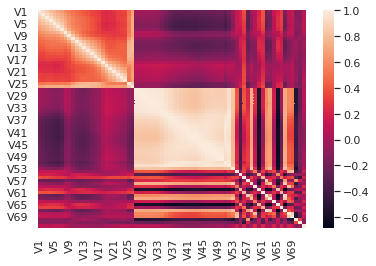

In [ ]:
sns.heatmap(X.corr())

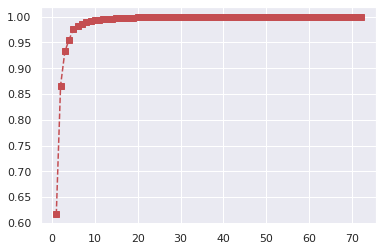

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA().fit(X)
plt.plot(np.arange(1, X.shape[1]+1), np.cumsum(X_pca.explained_variance_ratio_), 'rs--')

In [ ]:
pca = PCA(n_components=10).fit(X)
pca.components_.shape

(10, 72)

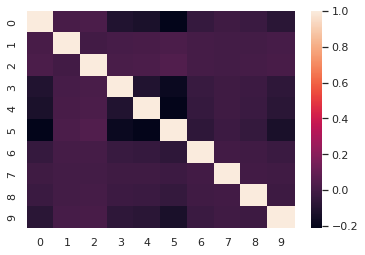

In [ ]:
sns.heatmap(np.corrcoef(pca.components_))#, annot=True)

# End